# TASK-4: Sales Prediction using Python.
## ● Predict future sales based on factors like advertising spend, target segment and platform.
## ● Prepare data through cleaning, transformation and feature selection.
## ● Use regression or time series models to forecast sales.
## ● Analyze how changes in advertising impact sales outcomes.
## ● Deliver actionable insights for business marketing strategies.

#  Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset:

In [2]:
df = pd.read_csv("Advertising.csv")
print("First 5 rows:\n", df.head())

First 5 rows:
    Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


#  Basic Info:

In [3]:
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Summary Statistics:
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   

# Check for Missing Values:

In [4]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


# Exploratory Data Analysis (EDA):

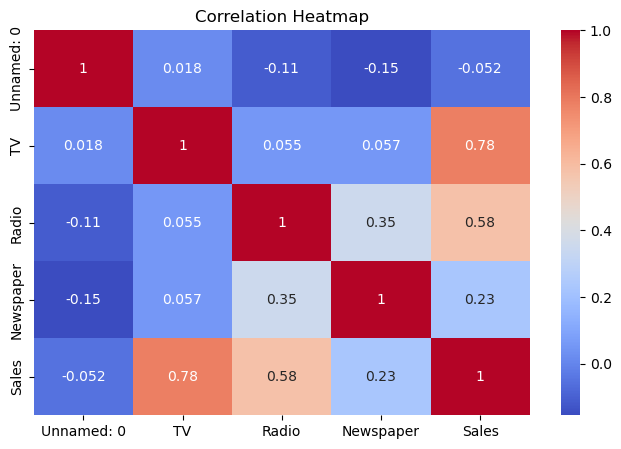

In [5]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot:

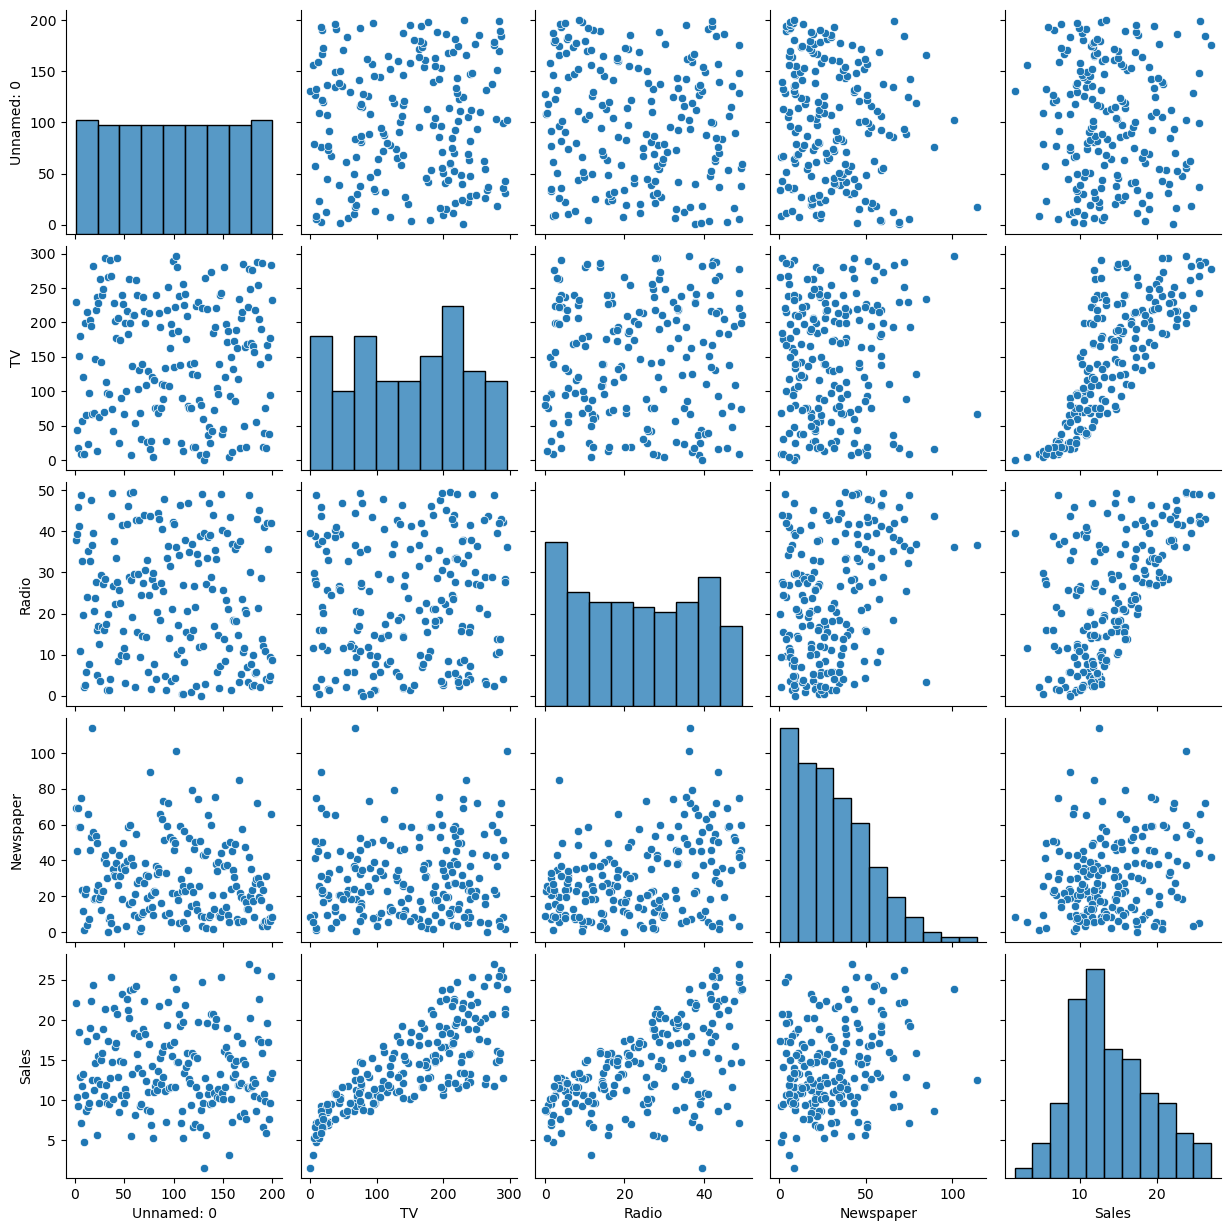

In [6]:
sns.pairplot(df)
plt.show()

# Feature Selection:

In [7]:
# We'll predict 'Sales' based on TV, Radio, Newspaper
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Train-Test Split:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training:

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Predictions:

In [10]:
y_pred = model.predict(X_test)

# Evaluation:

In [11]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Performance:
RMSE: 1.78
R² Score: 0.90


# Coefficients Interpretation:

In [12]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Coefficients:\n", coef_df)


Feature Coefficients:
      Feature  Coefficient
0         TV     0.044730
1      Radio     0.189195
2  Newspaper     0.002761


# Visualization of Predictions vs Actual:

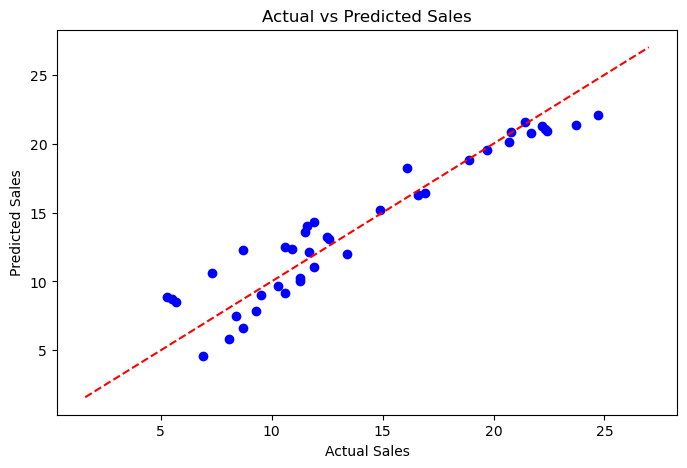

In [18]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

# Insights:

In [19]:
print("\n--- Business Insights ---")
print("1. TV and Radio advertising have the strongest positive impact on sales.")
print("2. Newspaper ads contribute less compared to TV and Radio.")
print("3. For better ROI, increase budget on TV & Radio campaigns.")


--- Business Insights ---
1. TV and Radio advertising have the strongest positive impact on sales.
2. Newspaper ads contribute less compared to TV and Radio.
3. For better ROI, increase budget on TV & Radio campaigns.
